<a href="https://colab.research.google.com/github/gaiecks/k-means-clustering/blob/main/kMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projeto tem como objetivo realizar a segmentação de clientes de um shopping utilizando o algoritmo de clustering K-means. A segmentação permite identificar grupos distintos de clientes com características semelhantes, auxiliando na criação de estratégias de marketing direcionadas e personalizadas.

Vamos iniciar importando as bibliotecas necessárias:



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
#Lendo os dados do arquivo CSV e plotando as primeiras linhas
df = pd.read_csv('/content/drive/MyDrive/análise de dados/Mall_Customers.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
#Verificando as colunas do arquivo
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
# Verificar valores ausentes
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Selecionando apenas colunas relevantes
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Agora vamos utilizar o método do cotovelo para determinar o número de Clusters para o conjunto de dados:

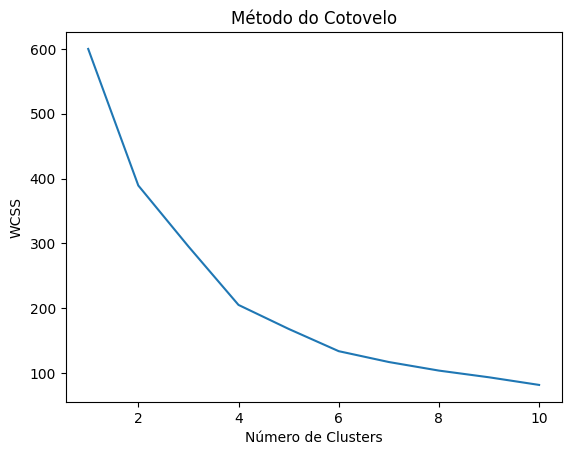

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


Observando o gráfico, vemos que A WCSS diminui rapidamente quando o número de clusters passa de 1 para 2, de 2 para 3 e de 3 para 4.
A partir de 4 clusters, a diminuição na WCSS começa a se estabilizar e se torna menos pronunciada.
Assim podemos concluir que o número ideal de Clusters para esse dataset é 4.
Utilizaremos k=4 no método K-means.

In [14]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adicionar a coluna de clusters ao DataFrame original
df['Cluster'] = y_kmeans


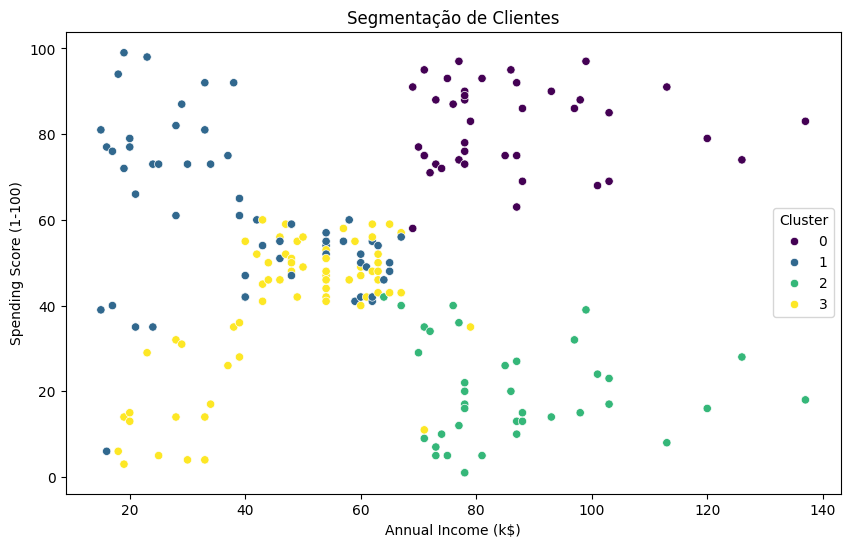

In [15]:
# Plotando o gráfico de segmentação de clientes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentação de Clientes')
plt.show()


Podemos verificar acima a distribuição dos 4 clusters de forma bem visual e clara.

In [16]:
# Selecionar apenas colunas numéricas para a média
numeric_columns = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]

# Imprimir as colunas usadas no K-means
print("Colunas usadas no K-means:")
print(numeric_columns.head())

# Calcular a média das colunas numéricas por cluster
print(df[numeric_columns.columns].groupby('Cluster').mean())


Colunas usadas no K-means:
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        1
1   21                  15                      81        1
2   20                  16                       6        1
3   23                  16                      77        1
4   31                  17                      40        1
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.875000           86.100000               81.525000
1        25.438596           40.000000               60.298246
2        39.368421           86.500000               19.578947
3        53.984615           47.707692               39.969231


Acima podemos ver os resultados dos clusters criados. podemos categorizá-los em:
0 - adultos com alta renda anual e alta pontuação de dados
1 - Jovens com renda mais baixa e moderada pontuação de gastos
2 - adultos com alta renda e baixa pontuação de gastos
3 - Adultos mais velhos com renda média e baixa pontuação de gastos.

Conclusão:
A segmentação de clientes utilizando K-means revelou quatro grupos distintos, cada um com características e comportamentos únicos. Essas informações são essenciais para desenvolver estratégias de marketing personalizadas, melhorar a experiência do cliente e aumentar a eficiência das campanhas de marketing.